# Topic Modeling

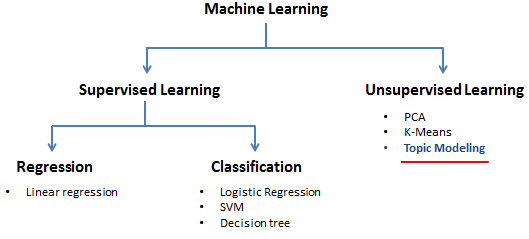

Source: https://thinkinfi.com/latent-dirichlet-allocation-for-beginners-a-high-level-overview/

# LDA(Latent Dirichlet Allocation)

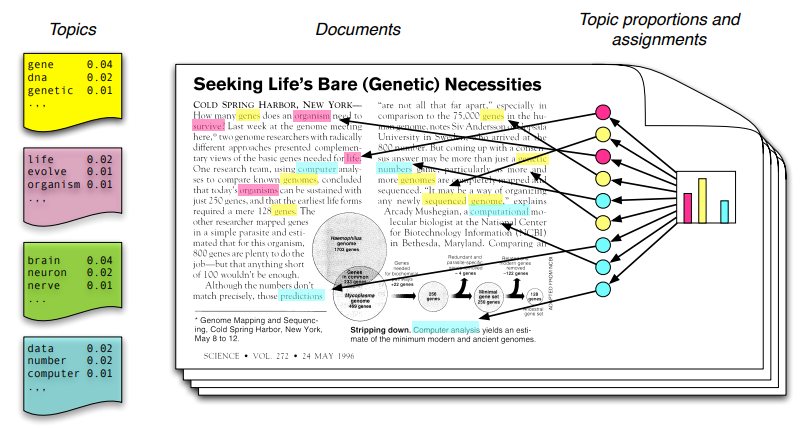

Blei, D. (2012), “Probabilistic Topic Models,” Communications of the ACM, 55, 77–84.

References

- D. Blei, A. Ng, and M. Jordan. (2013),  "Latent Dirichlet allocation," Journal of Machine Learning Research, 3:993–1022.
- https://medium.com/nanonets/topic-modeling-with-lsa-psla-lda-and-lda2vec-555ff65b0b05

# Environment settings

In [ ]:
import os
print(os.getcwd())

In [ ]:
pip install -r requirements.txt --user

In [ ]:
# pip install tensorflow --user

- conda install git

In [ ]:
# https://github.com/haven-jeon/PyKoSpacing
!pip install git+https://github.com/haven-jeon/PyKoSpacing.git --user

In [ ]:
!pip install git+https://github.com/ssut/py-hanspell.git --user

## Restart!

In [3]:
import pandas as pd
from collections import Counter
import warnings
warnings.filterwarnings(action='ignore')
import re
from tqdm.notebook import tqdm
from IPython.core.display import HTML
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pickle
import numpy
import os
# Import mallet packages
from gensim.models.wrappers import LdaMallet
from gensim.models.wrappers.ldamallet import malletmodel2ldamodel
from gensim import corpora
from gensim.models import CoherenceModel
from pprint import pprint

# 1. Data preparation and EDA

In [ ]:
Greview = pd.read_csv("TotalGameReview.csv", encoding = "utf-8")

In [ ]:
Greview

In [ ]:
Counter(Greview['Gname'])

In [ ]:
Greview = Greview[['Rtext']]

In [ ]:
Greview.head()

In [ ]:
Greview.info()

In [ ]:
Greview.isnull().sum()

In [ ]:
Greview = Greview.dropna().reset_index(drop = True)

# 2. Basic Preprocessing

In [ ]:
for i in Greview['Rtext'][0:50]:
    print(i); print("-"*30)

In [ ]:
def clean_text(text):
    '''
    Only Korean, English, and numbers are left.
    '''
    text = text.replace(".", " ").rstrip()
    text = re.sub(r'(https?://[^\s]+)', ' ', text)
    text = re.sub('[^가-힣|0-9|a-zA-Z]+', ' ', text)
    text = re.sub(' +', ' ', text)
    return text

In [ ]:
Greview['cleaned_text'] = ""
for i in tqdm(range(len(Greview))):
    Greview['cleaned_text'][i] = clean_text(Greview['Rtext'][i])

In [ ]:
%%time 
Greview['cleaned_text'] = Greview['Rtext'].apply(lambda x: clean_text(x))

In [ ]:
Greview = Greview[(Greview['cleaned_text']!= "") & (Greview['cleaned_text']!= " ")]
Greview = Greview.reset_index(drop = True)

In [ ]:
Greview

https://wikidocs.net/92961

https://github.com/haven-jeon/PyKoSpacing

- PyKoSpacing

In [ ]:
from pykospacing import Spacing
spacing = Spacing()

In [ ]:
print(Greview['cleaned_text'][830])

In [ ]:
print(spacing(Greview['cleaned_text'][830]))

- py-hanspell

https://github.com/ssut/py-hanspell

In [ ]:
from hanspell import spell_checker

In [ ]:
spelled_sent = spell_checker.check(Greview['cleaned_text'][830])

In [ ]:
print(Greview['cleaned_text'][830])

In [ ]:
print(spelled_sent.checked)

In [ ]:
def spell_check(text):
    try:
        spelled_sent = spell_checker.check(text)
        text = spelled_sent.checked
    except:
        text = text
    return text

In [ ]:
%%time
Greview['spell_check'] = Greview['cleaned_text'].apply(lambda x: spell_check(x))

In [ ]:
temp = Greview[['Rtext', 'spell_check']].sample(n = 5, random_state = 13).reset_index(drop=True)
temp.columns = ['변경 전', '변경 후']
display(HTML(temp.to_html()))

In [ ]:
Greview.to_csv("temp.csv", encoding = "utf-8", index = False)

In [8]:
Greview = pd.read_csv("temp.csv", encoding = "utf-8")

In [9]:
Greview

,Rtext,cleaned_text,spell_check
0,넓은 오픈월드,넓은 오픈월드,넓은 오픈월드
1,재미있긴한데 조금 잠이온다,재미있긴한데 조금 잠이온다,재미있긴 한데 조금 잠이 온다
2,말해뭐해 위쳐3 아직안한사람이 승리자,말해뭐해 위쳐3 아직안한사람이 승리자,말해 뭐 해 위여 3 아직 안 한 사람이 승리자
3,재밌음\n,재밌음,재밌음
4,good~~~ very,good very,good very
...,...,...,...
51584,오늘 밤! 사냥을 나선다!,오늘 밤 사냥을 나선다,오늘 밤 사냥을 나선다
51585,우리 캡콤이 달라졌어요\n\n☆☆★★★\n\n---------------------...,우리 캡콤이 달라졌어요 장점 몬헌인데 재탕이 아님 그래픽 VFX도 좋음 초심자도 할...,우리 캡콤이 달라졌어요 장점 몬헌인데 재탕이 아님 그래픽 VFX도 좋음 초심자도 할...
51586,개쩐다,개쩐다,개쩐다
51587,나는 CAPCOM을 사랑한다,나는 CAPCOM을 사랑한다,나는 CAPCOM을 사랑한다


In [ ]:
Greview

In [ ]:
Greview.isnull().sum()

In [ ]:
Greview['spell_check'][0]

In [ ]:
for i in tqdm(range(len(Greview))):
    if type(Greview['spell_check'][i]) == float:
        Greview['spell_check'][i] = Greview['cleaned_text'][i]

In [ ]:
Greview.isnull().sum()

# 3. Tokenization

In [4]:
Greview = pd.read_csv("temp.csv", encoding = "utf-8")

In [5]:
import platform
print(platform.architecture())

('64bit', 'WindowsPE')


https://github.com/lovit/customized_konlpy

In [ ]:
# 경로설정 = C:\Program Files\Java\jdk-16.0.2\bin

In [ ]:
# https://byeon-sg.tistory.com/entry/%EC%9E%90%EC%97%B0%EC%96%B4-%EC%B2%98%EB%A6%AC-konlpy-%EC%84%A4%EC%B9%98-%EC%98%A4%EB%A5%98-okt%EC%97%90%EB%9F%AC-already-loaded-in-another-classloader-SystemErro-1
# https://thinking-developer.tistory.com/45
# C:\Program Files\Java\jdk-16.0.2

https://github.com/lovit/customized_konlpy

In [6]:
# twitter 형태소 분석기
from ckonlpy.tag import Twitter

In [7]:
twitter = Twitter()

In [ ]:
print(Greview['spell_check'][0])
print(twitter.pos(Greview['spell_check'][0]))

In [ ]:
print(Greview['spell_check'][6])
print(twitter.pos(Greview['spell_check'][6]))

In [ ]:
twitter.add_dictionary('중세풍', 'Noun')

In [ ]:
print(Greview['spell_check'][6])
print(twitter.pos(Greview['spell_check'][6]))

한국어 불용어 제거

먼저 한국어 같은 경우는 토큰화 단계에서 조사나, 접속사를 제거하면 됨으로 따로 정해진 불용어가 없습니다

한국어 불용어를 제거하는 더 좋은 방법은 코드 내에서 직접 정의하지 않고 txt 파일이나 csv 파일로 수많은 불용어를 정리해놓고, 이를 불러와서 사용하는 방법입니다.



In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

In [ ]:
stopwords.words('english')

In [ ]:
stop_words = []

In [ ]:
from ckonlpy.tag import Postprocessor

In [ ]:
# 명사만
passtags = {'Noun'}
postprocessor = Postprocessor(twitter, passtags = passtags)
postprocessor.pos(Greview['spell_check'][6])

In [ ]:
def tokenization(text):
    tokens = postprocessor.pos(text)
    tokens = [word[0] for word in tokens if word[0] not in stop_words]
    return tokens

In [ ]:
%%time
Greview['tokens'] = Greview['spell_check'].apply(lambda x: tokenization(x))

In [ ]:
Greview['token_len'] = Greview['tokens'].apply(lambda x: len(x))

In [ ]:
Greview = Greview[Greview['token_len']>=3]

In [ ]:
Greview

In [ ]:
Greview.to_csv("temp.csv", encoding = "utf-8", index= False)

In [ ]:
Greview = pd.read_csv("temp.csv", encoding = "utf-8")

In [ ]:
import ast
Greview['tokens'] = Greview['tokens'].apply(lambda x: ast.literal_eval(x))

# Additional preprocessing

In [ ]:
# Join the review.
word_list = ",".join([",".join(i) for i in Greview['tokens']])
word_list = word_list.split(",")

In [ ]:
word_list[0:10]

In [ ]:
word_count = pd.Series(word_list).value_counts()

In [ ]:
# Create a WordCloud object - 한글은 폰트 경로 설정 꼭 해주어야 함
wordcloud = WordCloud(font_path = "‪‪C:/Windows\/Fonts/HMFMMUEX.TTC",
                      background_color="white", max_words=100, contour_width=3, contour_color='steelblue')

In [ ]:
# Generate a word cloud
wordcloud.generate_from_frequencies(dict(word_count))
plt.figure(figsize= (20,7))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title("Common 100 words in game reviews", pad = 14, weight = 'bold')
plt.show()

In [ ]:
word_count[0:50]

## Removing (in)frequent words /  Word transformation

In [ ]:
temp = pd.DataFrame(word_count, columns = ['count'])

In [ ]:
stop_words = list(temp[temp['count']==1].reset_index(drop = False)['index'])

In [ ]:
stop_words.extend(["게임", "이", "것", "수", "안", "때", "그", "까지", "면서", "게", "거", "더", "좀", "내", "고", "적","면서", "해도", "길", "처럼", "생", "거의", "어가", "사람", 
                   "세", "함","말","임", "밀", "역", "번", "다가", "나", "어서", "걸", "중", "분", "탁", "려고", "지금", "어요", "개", "빻빻빻빻빻빻빻빻", "수도", "기", "하니",
                   "때문", "거나", "등","몬헌", "세키로", "위", "여", "리듬", "닥터", "스컬", "일", "듯", "지겐", "뭐", "부터", "건", "저", "보", "몬스터", "헌터", "주", "리", "제발", "진짜", "를",
                  "데", "면", "만큼", "제", "의", "게롤트", "시리", "트리스", "블러드", "두", "아하", "전", "로", "줄", "몇", "티", "해", "왜", "로", "꼭", "못", "모두", "인적", "하나", "남작", "피", "경우", "또한", "살", "이제",
                  "편", "정도", "와인", "또", "알", "보고", "그냥", "아직", "점", "스카이림", "가지", "일단", "즐", "이나", "시", "존나", "요", "사서", "예", "오브", "궨트", "난", "게로", "로트", "궨", "터", "후", "성", "도"])

In [ ]:
stop_words[0:20]

In [ ]:
def word_change(word):
    if word == "겜":
        return "게임"
    if word == "잼":
        return "재미"
    if word == "퀘":
        return "퀘스트"
    return word

def add_pre(tokens):
    tokens = [word_change(word) for word in tokens if word not in stop_words]
    return tokens

In [ ]:
%%time
Greview['cleaned_tokens'] = Greview['tokens'].apply(lambda x: add_pre(x))

In [ ]:
Greview.to_csv("temp.csv", encoding = "utf-8", index= False)

- 꿀팁

In [ ]:
Greview = pd.read_csv("temp.csv", encoding = "utf-8")

In [ ]:
import ast
Greview['cleaned_tokens'] = Greview['cleaned_tokens'].apply(lambda x: ast.literal_eval(x))

In [ ]:
Greview['cleaned_tokens'][0]

# Bi-gram

In [ ]:
from nltk.util import everygrams

In [ ]:
Greview['cleaned_tokens'][21]

In [ ]:
list(everygrams(Greview['cleaned_tokens'][21], min_len =2, max_len = 2))

In [ ]:
%%time
Greview['bi_gram'] = Greview['cleaned_tokens'].apply(lambda x: ["_".join(i) for i in list(everygrams(x, min_len =1, max_len = 2))])

In [ ]:
Andrew McCullum

# LDA MALLET

After using the basic LDA model in gensim, I decided to try another LDA model called LDA Mallet. Mallet has an efficient implementation of the LDA. It's known to run faster and gives better topics segregation. I downloaded the zip file from here.

It uses Gibbs sampling based implementations of Latent Dirichlet Allocation (LDA), Pachinko Allocation and Hierarchical LDA.

- http://mallet.cs.umass.edu/download.php

In [ ]:
os.environ['MALLET_HOME'] = 'C:/Mallet/' # My mallet path, it is needed to instantiate MAllet model

In [ ]:
#  point the path to the mallet path on my computer
mallet_path = 'c:/Mallet/bin/mallet' #insert the path

In [ ]:
texts = Greview['bi_gram']

In [ ]:
%%time
# Create Dictionary
id2word_1 = corpora.Dictionary(texts)

In [ ]:
print(id2word_1)

In [ ]:
%%time
# Create Corpus: Term Document Frequency
corpus_1 = [id2word_1.doc2bow(token) for token in texts]

In [ ]:
corpus_1

In [ ]:
id2word_1[8]

In [ ]:
print(Greview['cleaned_tokens'][2])
print(Greview['cleaned_tokens'][2].count('게임'))

In [ ]:
%%time 
# Instantiate
ldamallet = LdaMallet(mallet_path, corpus=corpus_1, num_topics=10, id2word=id2word_1)

In [ ]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# To find the optimum number of topics

perplexity is a measurement of how well a probability distribution or probability model predicts a sample. It may be used to compare probability models. A low perplexity indicates the probability distribution is good at predicting the sample.

The coherence score is used in assessing the quality of the learned topics, the closer to 1 the better

In [ ]:
# Defining a function to get coherence score
def coherence_score(limit, start, step):
    coherence_values = []; model_list = []
    for num_topics in range(start, limit, step):
        model = LdaMallet(mallet_path, corpus=corpus_1, num_topics=num_topics, id2word=id2word_1)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=id2word_1, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [ ]:
%%time
# To get the coherence values
model_list, coherence_values = coherence_score(limit=11, start=3, step=1)

In [ ]:
# Show graph for the coherence value scores vs number of topics
limit=11; start=3; step=1;
topics = range(start, limit, step)
plt.plot(topics, coherence_values)
plt.title("Coherence value score with the number of topics")
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.show()

In [ ]:
# Print the coherence scores
for best, cv in zip(topics, coherence_values):
    print("Topic ", best, " has Coherence Value of", round(cv, 4))

In [ ]:
# printing the best topics
optimal_model = model_list[4]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

# 토픽 결과

#### 게임 자체에 대한 긍정 평가

- Topic 1: 게임 / 최고 / 갓 / 명작 / 필요 / 인생 / 할인 / 취향 / 인생게임 / 판타지

#### 게임 진행흐름에 대한 평가

- Topic 2: 재미 / 엔딩 / 처음 / 다시/ 초반 / 시작 / 지루 / 조금 / 드라마 / 인지

#### 플레이 경험에 기반한 평가

- Topic 3 : 스토리 / 전투 / 감/ 조작/ 단점 / 조작_감 / 진행 / 장점 / 액션 / 불편
- Topic 6 : 스토리 / 그래픽 / 모드 / 캐릭터 / 모든 / 매우 / 매력 /자체 / 완벽 / 작품
- Topic 7 : 시간 / 플레이 / 스토리 / 정말 / 추천 / 몰입 / 구매 / 스팀 / 영화 / 타임

#### 개인 견해에 기반한 평가

- Topic 4: 생각 / 선택 / 느낌 / 평가 / 다른 / 부분 / 주인공 / 세계관 / 시리즈 / 전작

#### 게임 내 퀘스트에 대한 평가

- Topic 5: 퀘스트 / 메인 /서브 / 서브_퀘스트 / 버그 / 메인_퀘스트 / 이야기 /메인_스토리 / 클리어 / 부가

In [ ]:
best_model = model_list[4]

In [ ]:
# Save model
with open('best.model', 'wb') as f:
    pickle.dump(best_model, f)
    f.close()

In [ ]:
# load in trained model 
filehandler = open('best.model', 'rb')
mgp = pickle.load(filehandler)

In [ ]:
pprint(mgp.print_topics(num_words=10))

What does this mean?
The first topics looks like this:

[(0,
'0.064*"seat" + 0.040*"interior" + 0.025*"package" + 0.024*"nice" + '
'0.022*"comfortable" + 0.021*"rear" + 0.020*"small" + 0.016*"ride" + '
'0.016*"room" + 0.012*"space"'),.

It means all these keywords contributed to this topics and the number is the weight of the individual keyword, "seat" has the highest weight

The weights reflect how important a keyword is to that topic. One could say maybe this topic is explaining the seat & interior space of the brands

# 설명 블로그

https://happy-obok.tistory.com/5